# Predict Term Deposit

 Data Description


 This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives us information about a marketing campaign of a financial institution in which we will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.


Import Libraries


In [94]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [95]:
#create data Frame to read data set
df = pd.read_csv('C:/Users/Aditya Rai/Dropbox/PC/Desktop/Bank-Term-Deposit-Prediction/dataset/bank.csv')


In [96]:
# finding number of rows and column
df.shape

(11162, 17)

In [97]:
#checking first 5 rows.
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [98]:
# checking the df structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [99]:
# describe df numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# Exploratory Data Analysis

 1 Finding Missing Values

 2 Finding Features with one value

 3 Explore the Categorical Features

 4 Checking the Data set is balanced or not based on target

 5 Finding Categorical Feature Distribution using countplot.

 6 Relationship between Categorical Features and Deposit

 7 Finding Numerical Feature Distribution with distplot.

 8 Checking Outliers in numerical features with Box plot.

 9 correlation plot.

In [100]:
#finding missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

No missing values found


In [101]:
#Finding Features with One Value
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

No features with One Value

In [102]:
#Explore the Categorical Features.
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


there are 9 categorical independent features

feature job and month has highest number of categorical values

In [103]:
#Checking the Dataset is balanced or not based on target values.
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

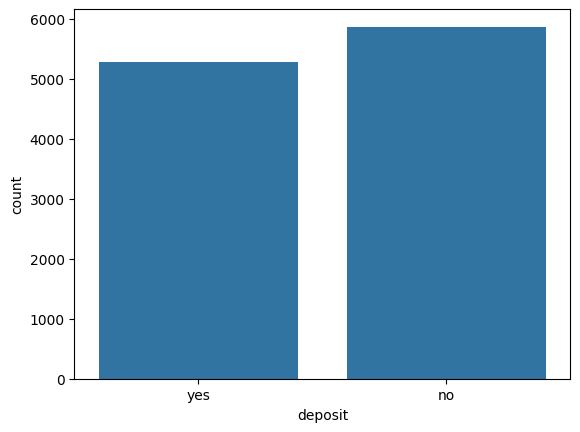

In [104]:
sns.countplot(x='deposit',data=df)
plt.show()

Dataset seems to be Balanced


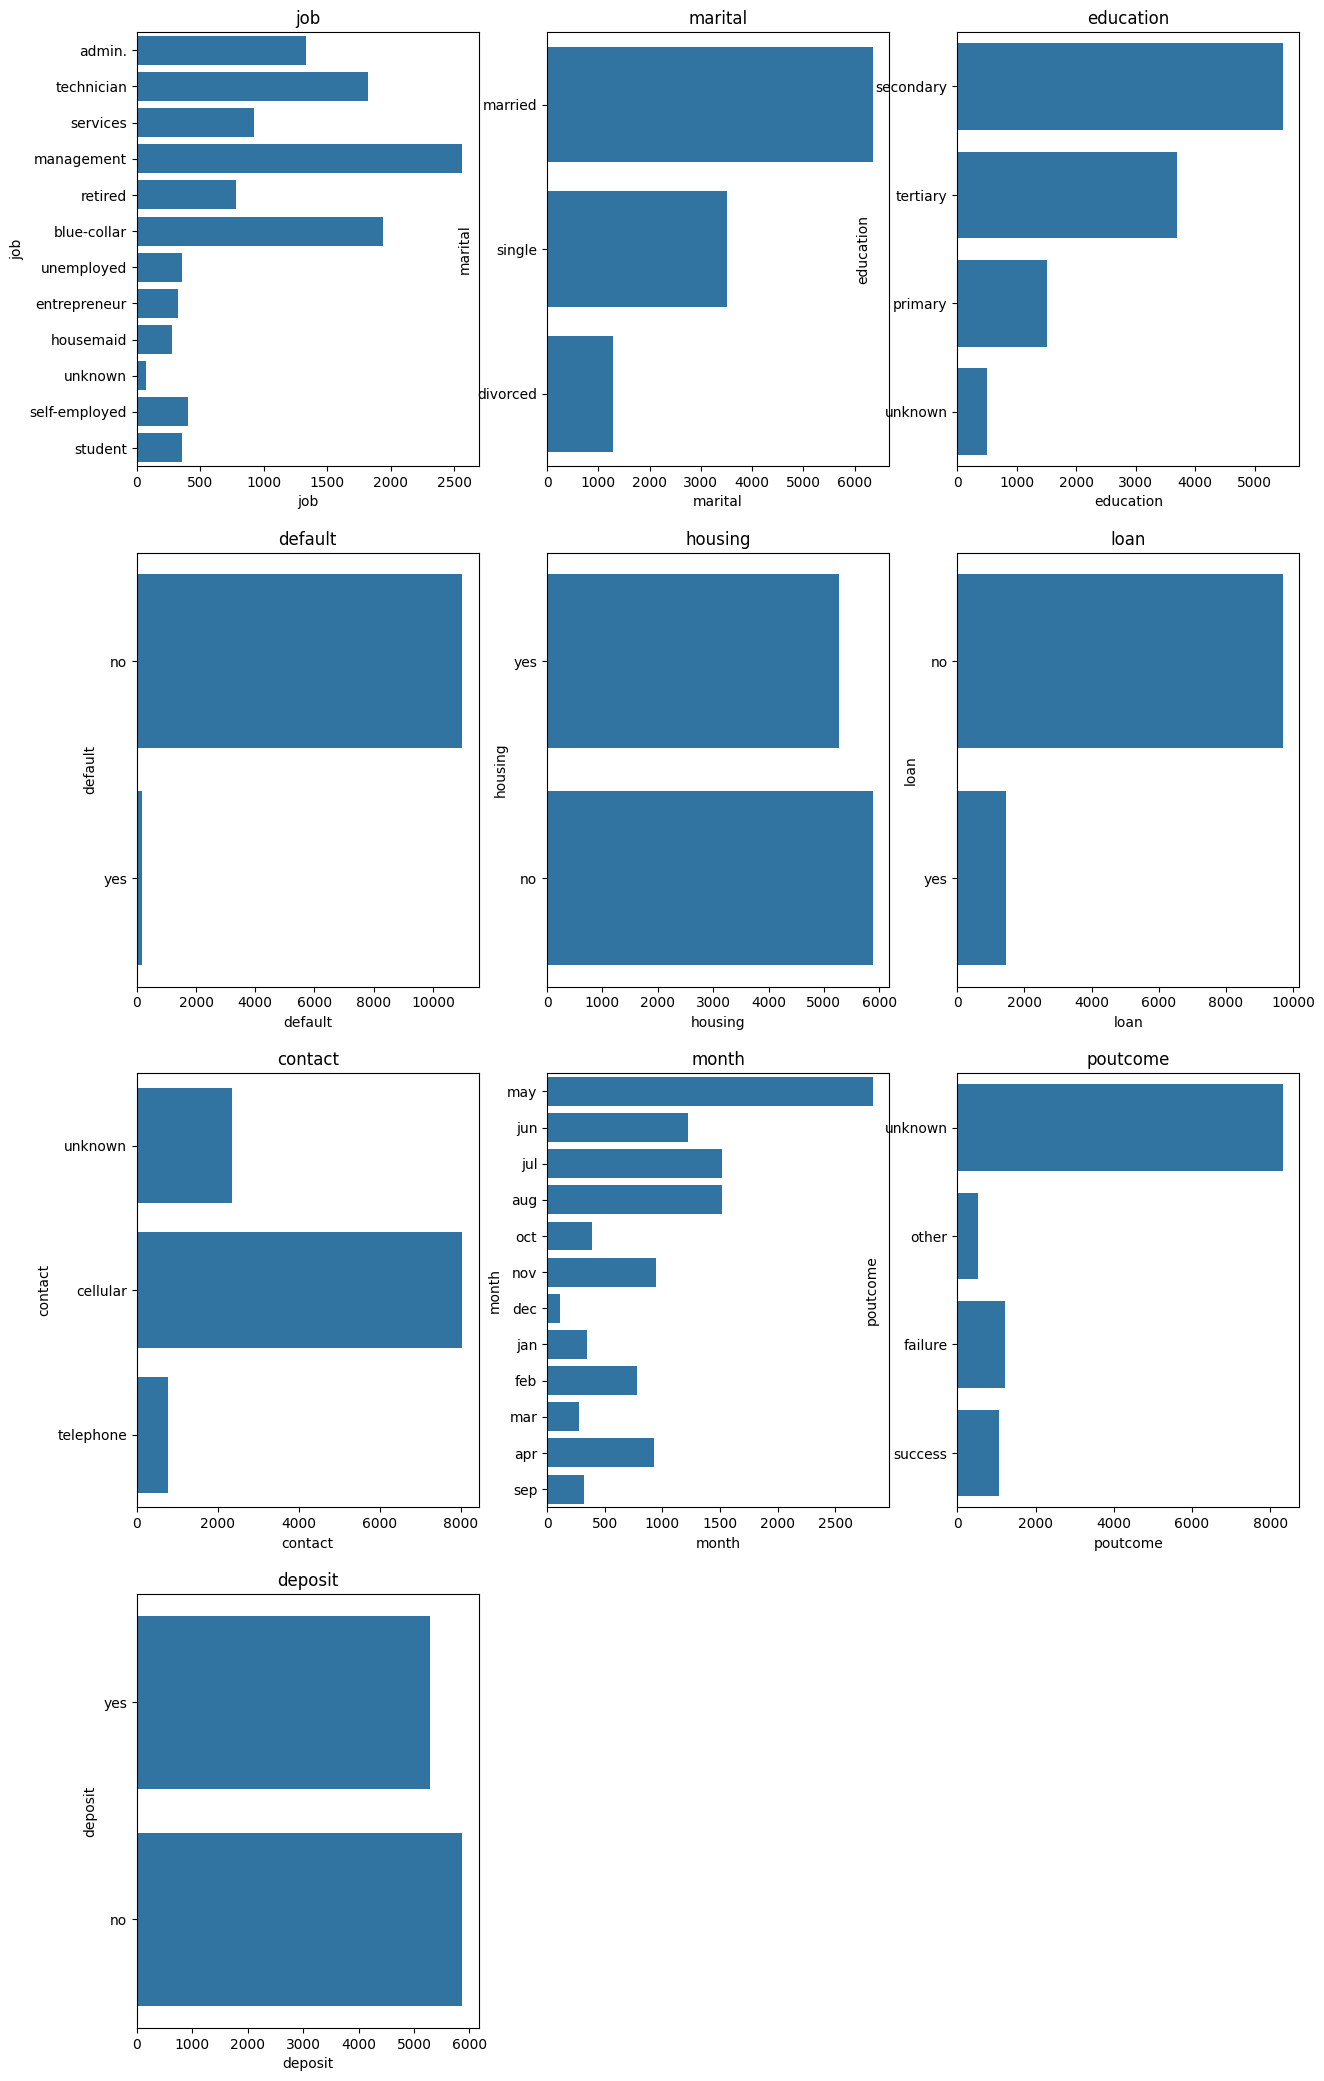

In [105]:
#checking count of Categorical features.
categorical_features = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

 In job management records are high and housemaid are very less.

 defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop


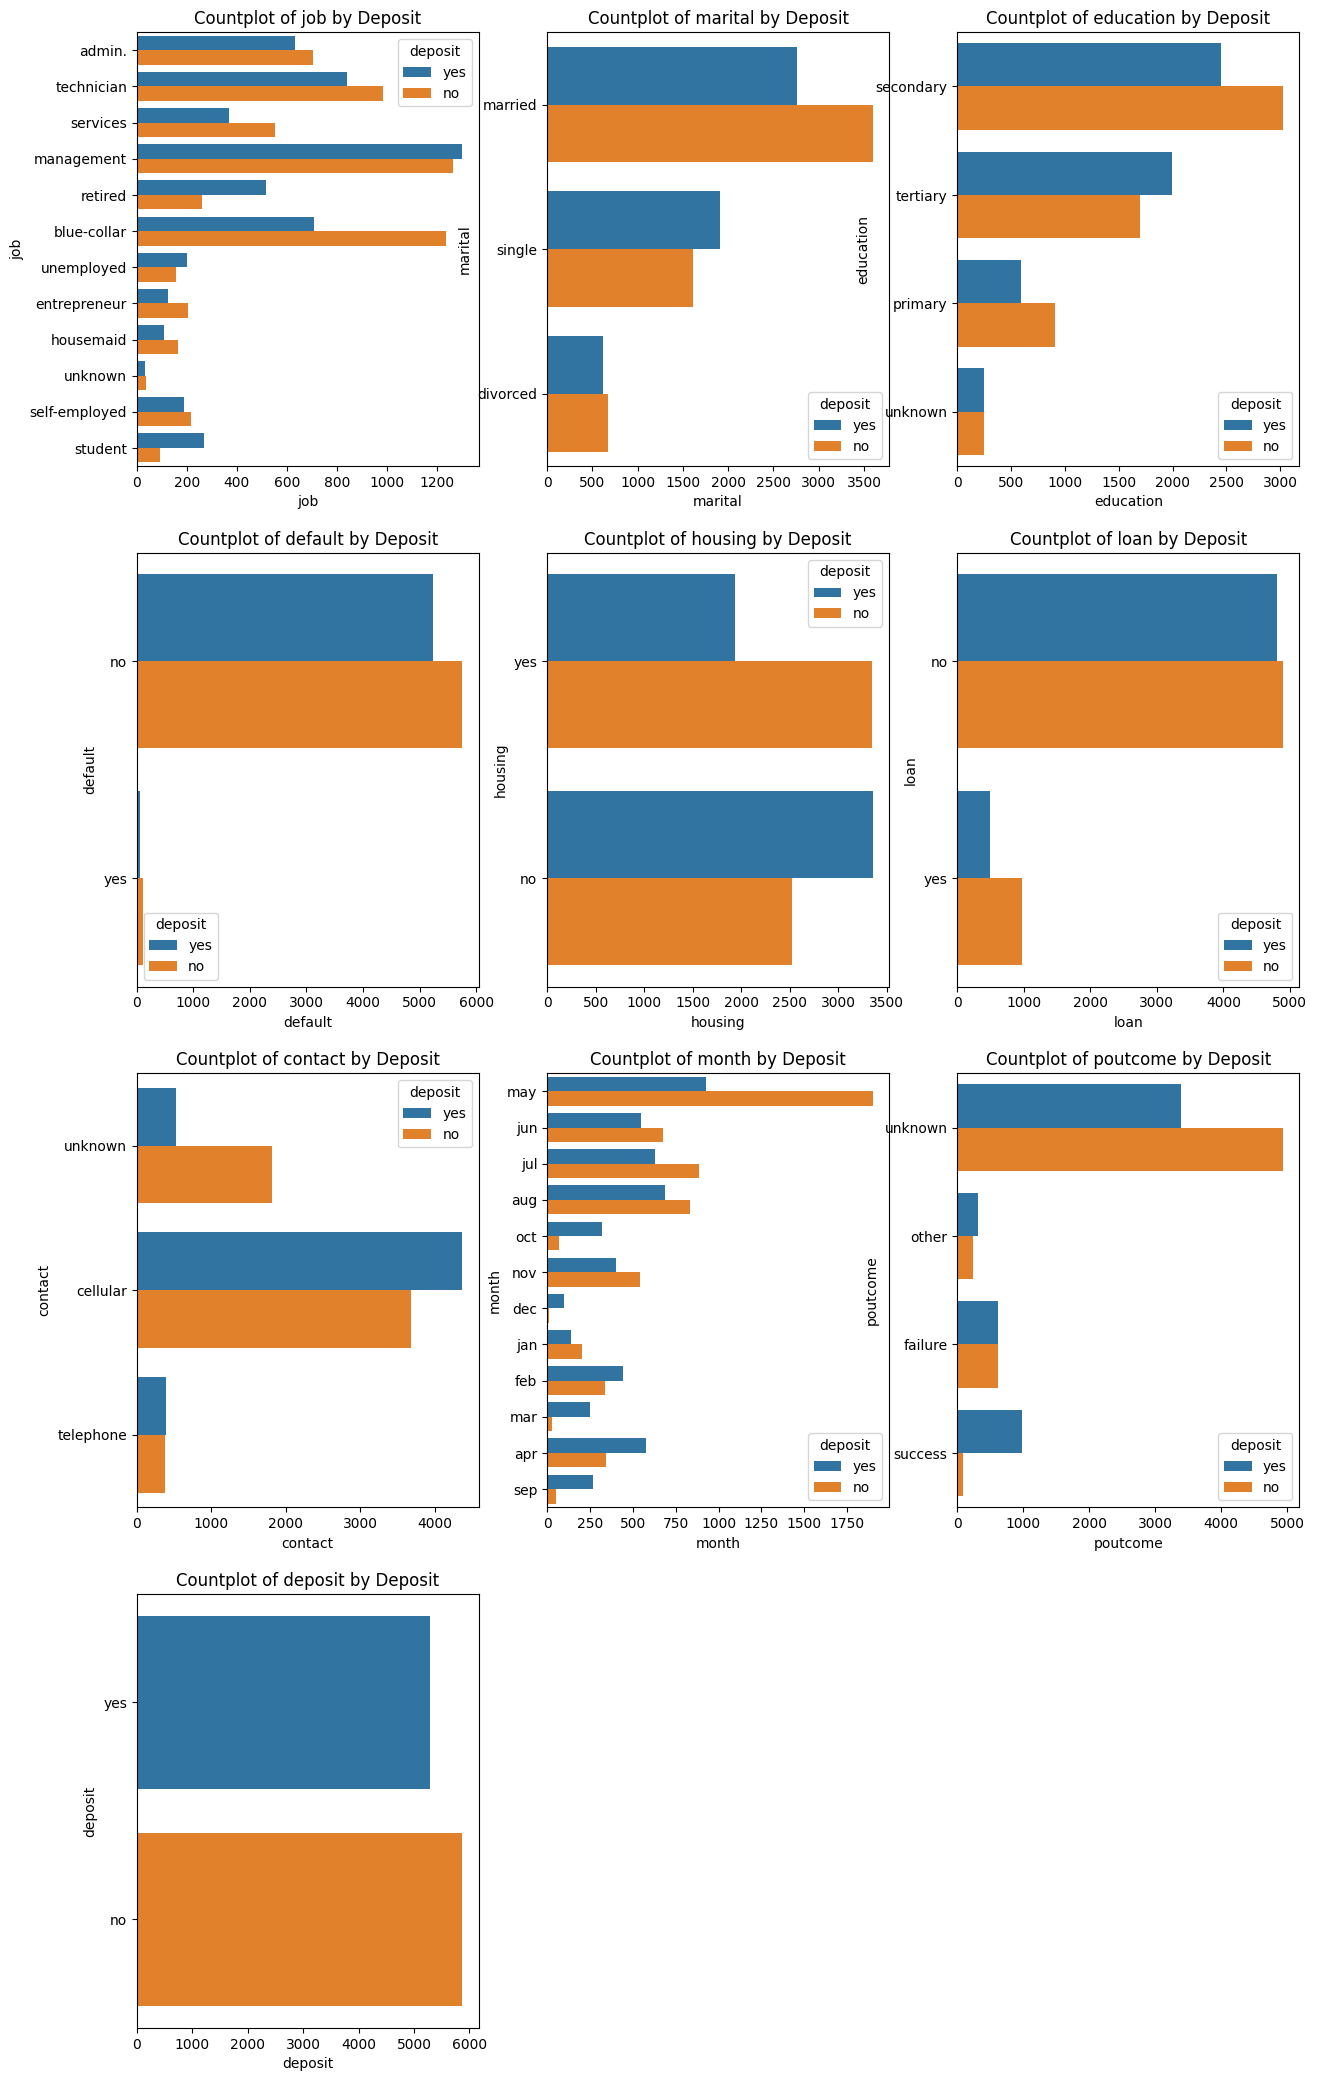

In [106]:
categorical_features = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,hue='deposit',data=df)
    plt.xlabel(categorical_feature)
    plt.title(f'Countplot of {categorical_feature} by Deposit')
    plotnumber+=1
plt.show()

client who has housing loan seems to be not interested much on deposit

if poutcome is success then, there is high chance of client to show interest on deposit.

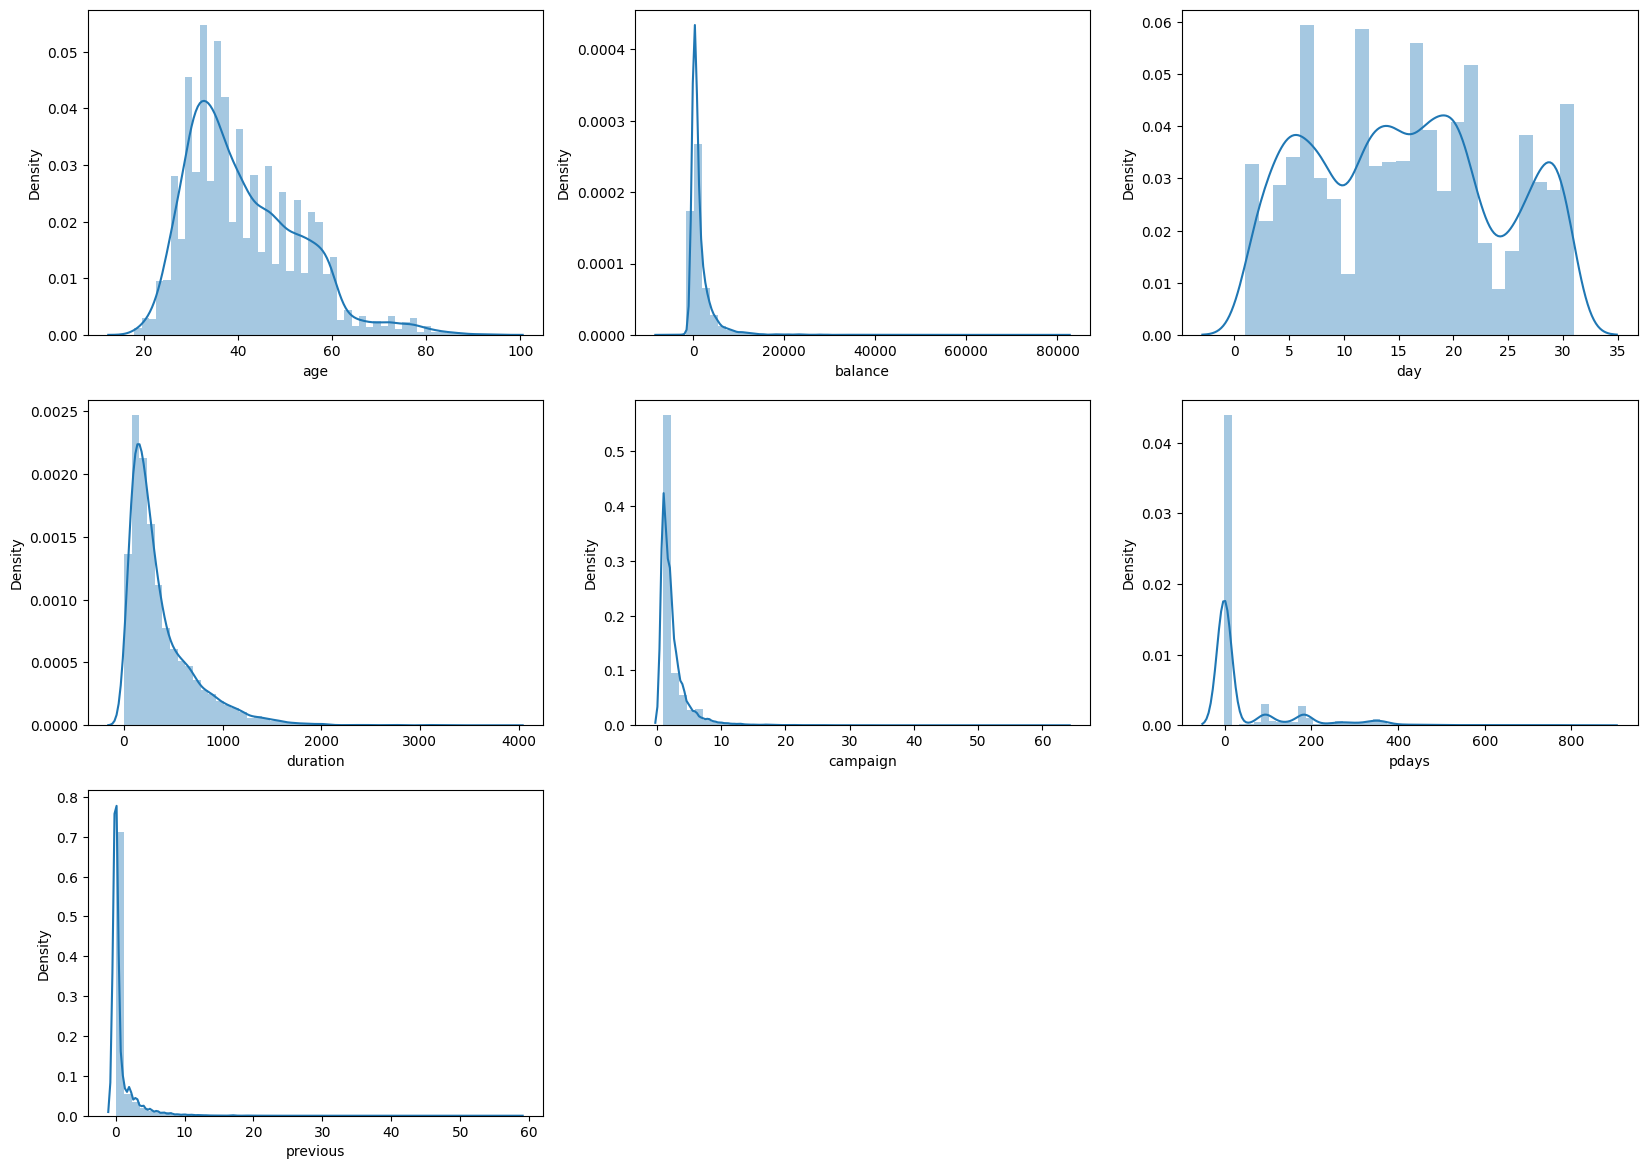

In [107]:
#Distribution of numerical features
numerical_cols = df.select_dtypes(include='number')
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_cols in numerical_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[numerical_cols])
    plt.xlabel(numerical_cols)
    plotnumber+=1
plt.show()

Features like age , days are distributed normally.

Balance,duration,campaing,pdays and previous are heavely skewed towards left and seems have some outliers.

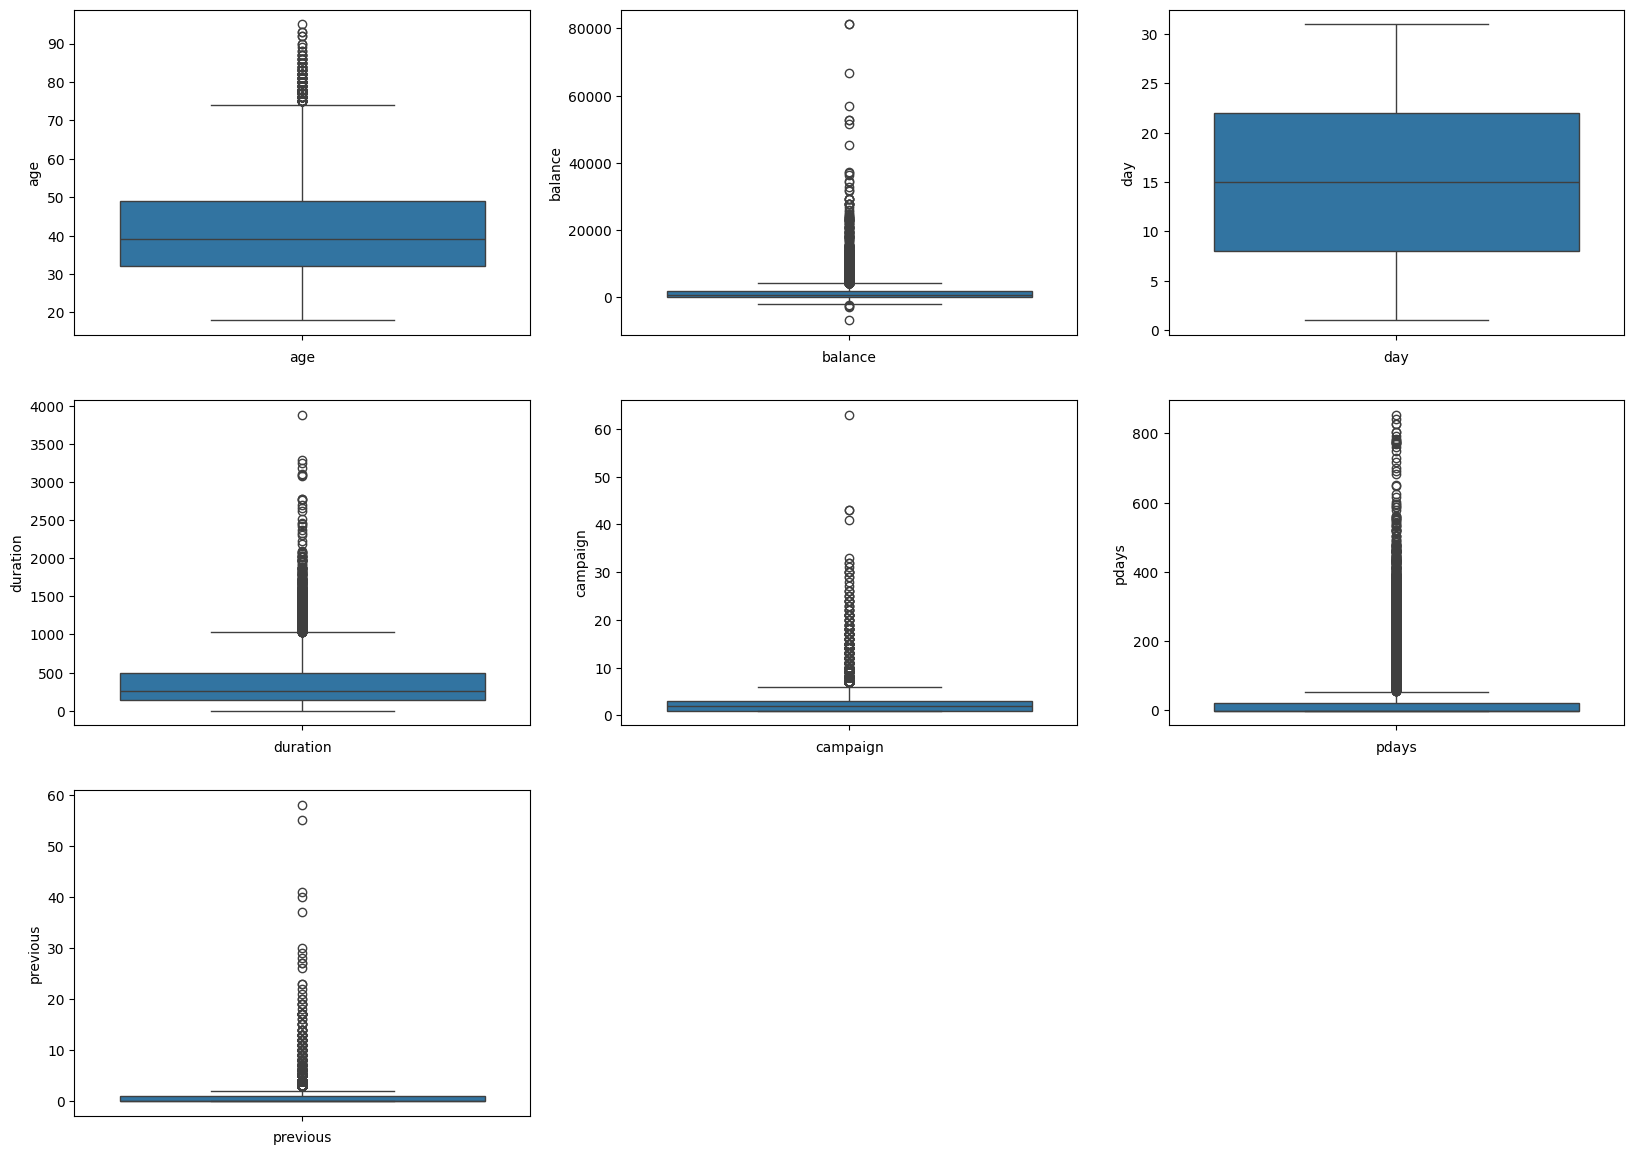

In [26]:
#boxplot on numerical features to find outliers
numerical_cols = df.select_dtypes(include='number')
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_cols in numerical_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_cols])
    plt.xlabel(numerical_cols)
    plotnumber+=1

Except day all other features has outliers

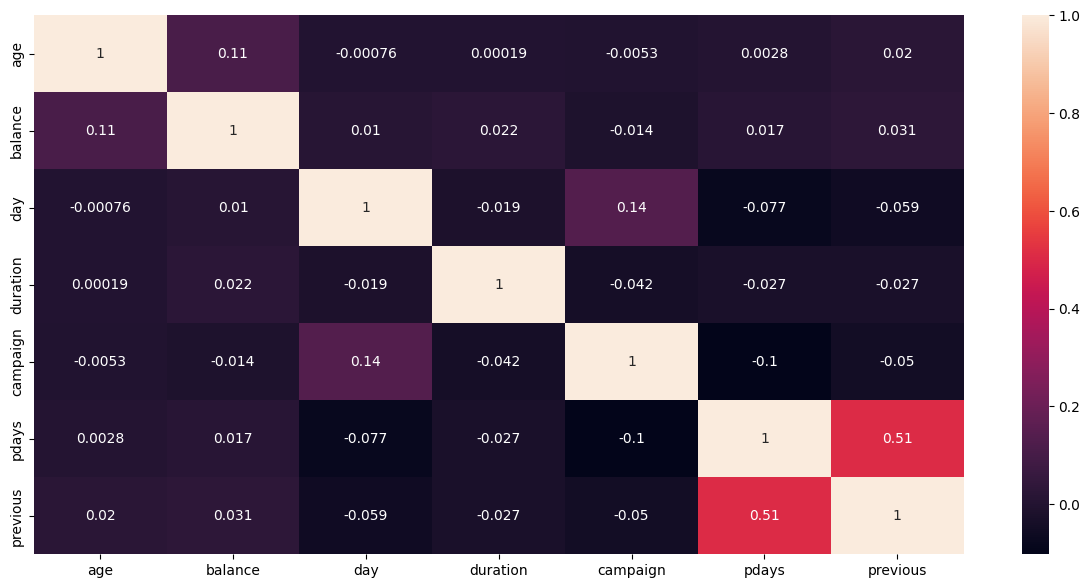

In [27]:
numerical_df = df.select_dtypes(include='int64')
cor_mat = numerical_df.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(cor_mat, annot=True)
plt.show()


it seems no feature is heavily correlated with other features

# Feature Engineering

Outliers Removing


Default Feature Does not Have significant impact on Target column

In [28]:
#defaut features does not play imp role
df.drop(['default'],axis=1, inplace=True)

In [29]:
df['pdays'].value_counts()

pdays
-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: count, Length: 472, dtype: int64

In [30]:
# drop pdays as it has -1 value more.
df.drop(['pdays'],axis=1, inplace=True)

In [31]:
df.groupby('age',sort=True)['age'].count()


age
18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64

These can be ignored and values lies in between 18 to 95

In [32]:
df.groupby(['deposit','balance'],sort=True)['balance'].count()
#these outlier should not be remove as balance goes high, client show interest on deposit

deposit  balance
no       -6847      1
         -2712      1
         -2282      1
         -2049      1
         -1965      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     2
Name: balance, Length: 5082, dtype: int64

In [33]:
df.groupby(['deposit','duration'],sort=True)['duration'].count()
#these outlier should not be remove as duration goes high, client show interest on deposit

deposit  duration
no       2           1
         3           1
         4           2
         5           4
         6           6
                    ..
yes      3094        1
         3102        1
         3183        1
         3253        1
         3881        1
Name: duration, Length: 2157, dtype: int64

In [34]:
df.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
         33             1
         41             1
         43             2
         63             1
yes      1           2561
         2          

In [35]:
df = df[df['campaign'] < 33]

In [36]:
df.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           2237
         2           1627
         3            703
         4            454
         5            239
         6            173
         7             92
         8             96
         9             51
         10            38
         11            24
         12            25
         13            24
         14            11
         15             9
         16             7
         17             8
         18             8
         19             5
         20             4
         21             7
         22             4
         23             3
         24             4
         25             3
         26             3
         27             1
         28             1
         29             1
         30             4
         31             1
         32             1
yes      1           2561
         2           1401
         3            618
         4            317
         5            139
         6          

In [37]:
df.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
         37             1
         40             1
         41             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10         

In [38]:
df = df[df['previous'] < 31]

In [39]:
df.groupby(['deposit','previous'],sort=True)['previous'].count()

deposit  previous
no       0           4935
         1            304
         2            237
         3            141
         4             73
         5             44
         6             34
         7             23
         8             21
         9             10
         10             4
         11             8
         12             6
         13             2
         14             1
         15             4
         16             2
         17             8
         18             1
         19             2
         20             1
         23             1
         27             2
         28             1
yes      0           3384
         1            583
         2            456
         3            294
         4            171
         5            121
         6             83
         7             54
         8             39
         9             24
         10            26
         11            15
         12            10
         13         

Label Encoding (Converting Ctegorical features to numeric)

In [40]:
le=LabelEncoder()

In [41]:
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,0,unknown,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,0,unknown,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,0,unknown,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,1,yes,no,cellular,20,apr,257,1,0,unknown,no
11158,39,services,married,secondary,733,no,no,unknown,16,jun,83,4,0,unknown,no
11159,32,technician,single,secondary,29,no,no,cellular,19,aug,156,2,0,unknown,no
11160,43,technician,married,secondary,0,no,yes,cellular,8,may,9,2,5,failure,no


In [42]:
df['job'] = le.fit_transform(df['job'])

In [43]:
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])

In [44]:
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['deposit'] = le.fit_transform(df['deposit'])

Standardization

In [45]:
sc=StandardScaler()

In [46]:
df['balance'] = sc.fit_transform(df['balance'].values.reshape(-1, 1))
df['duration'] = sc.fit_transform(df['duration'].values.reshape(-1, 1))

In [47]:
df

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,0,1,1,0.252551,1,0,2,5,8,1.929394,1,0,3,1
1,56,0,1,1,-0.459865,0,0,2,5,8,3.153552,1,0,3,1
2,41,9,1,1,-0.080096,1,0,2,5,8,2.928883,1,0,3,1
3,55,7,1,1,0.293783,1,0,2,5,8,0.595782,1,0,3,1
4,54,0,1,2,-0.416773,0,0,2,5,8,0.866537,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,-0.473506,1,0,0,20,0,-0.331698,1,0,3,0
11158,39,7,1,1,-0.246574,0,0,2,16,6,-0.832882,4,0,3,0
11159,32,9,2,1,-0.464825,0,0,0,19,1,-0.622615,2,0,3,0
11160,43,9,1,1,-0.473816,0,1,0,8,8,-1.046030,2,5,0,0


# Splitting Data Into Test and Train

In [48]:
X = df.drop(['deposit'],axis=1)
y = df['deposit']

In [49]:
X.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,59,0,1,1,0.252551,1,0,2,5,8,1.929394,1,0,3
1,56,0,1,1,-0.459865,0,0,2,5,8,3.153552,1,0,3
2,41,9,1,1,-0.080096,1,0,2,5,8,2.928883,1,0,3
3,55,7,1,1,0.293783,1,0,2,5,8,0.595782,1,0,3
4,54,0,1,2,-0.416773,0,0,2,5,8,0.866537,2,0,3


In [50]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11152, dtype: int32

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

# Model Buliding

# Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf=RandomForestClassifier()

In [54]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
y_pred=rf.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred)

0.8435679067682653

In [57]:
confusion_matrix(y_test,y_pred)

array([[976, 203],
       [146, 906]], dtype=int64)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1179
           1       0.82      0.86      0.84      1052

    accuracy                           0.84      2231
   macro avg       0.84      0.84      0.84      2231
weighted avg       0.84      0.84      0.84      2231



# Xgb Classifier

In [59]:
from xgboost.sklearn import XGBClassifier

In [60]:
xg=XGBClassifier()

In [61]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [62]:
y_new=xg.predict(X_test)

In [63]:
accuracy_score(y_test,y_new)

0.8529807261317794

In [64]:
confusion_matrix(y_test,y_new)

array([[982, 197],
       [131, 921]], dtype=int64)

In [65]:
print(classification_report(y_test,y_new))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      1179
           1       0.82      0.88      0.85      1052

    accuracy                           0.85      2231
   macro avg       0.85      0.85      0.85      2231
weighted avg       0.85      0.85      0.85      2231



# LogisticRegression

In [66]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [67]:
log.fit(X_train,y_train)

LogisticRegression()

In [68]:
y_log=log.predict(X_test)

In [69]:
accuracy_score(y_test,y_log)

0.7911250560286867

In [70]:
confusion_matrix(y_test,y_log)

array([[970, 209],
       [257, 795]], dtype=int64)

In [71]:
print(classification_report(y_test,y_log))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81      1179
           1       0.79      0.76      0.77      1052

    accuracy                           0.79      2231
   macro avg       0.79      0.79      0.79      2231
weighted avg       0.79      0.79      0.79      2231



# DecisionTree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [73]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [74]:
y_dt=dt.predict(X_test)

In [75]:
accuracy_score(y_test,y_dt)

0.7637830569251457

In [76]:
confusion_matrix(y_test,y_dt)

array([[946, 233],
       [294, 758]], dtype=int64)

In [77]:
print(classification_report(y_test,y_dt))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1179
           1       0.76      0.72      0.74      1052

    accuracy                           0.76      2231
   macro avg       0.76      0.76      0.76      2231
weighted avg       0.76      0.76      0.76      2231



# Hyper Parameter Tunning RF

In [78]:
param={'n_estimators':[10,50,100,130],'max_depth':[5,10,15],'bootstrap':[True,False]}

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
gsc=GridSearchCV(estimator=rf,
                 param_grid=param,
                 scoring='accuracy')

In [81]:
gsc.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'n_estimators': [10, 50, 100, 130]},
             scoring='accuracy')

In [82]:
gsc.best_params_

{'bootstrap': True, 'max_depth': 15, 'n_estimators': 50}

In [83]:
gsc.best_score_

0.8447468942734044

In [84]:
y_gsc=gsc.predict(X_test)

In [85]:
accuracy_score(y_test,y_gsc)

0.8444643657552667

In [86]:
confusion_matrix(y_test,y_gsc)

array([[967, 212],
       [135, 917]], dtype=int64)

In [87]:
print(classification_report(y_test,y_gsc))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1179
           1       0.81      0.87      0.84      1052

    accuracy                           0.84      2231
   macro avg       0.84      0.85      0.84      2231
weighted avg       0.85      0.84      0.84      2231



# Hyper Parameter Tunning XGBoost

In [88]:
xgbparam={'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]}

In [89]:
from xgboost import XGBClassifier

In [90]:
gsc=GridSearchCV(estimator=xg,
                 param_grid=xgbparam,
                 scoring='accuracy')

In [91]:
gsc.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy')

In [92]:
gsc.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}

In [93]:
gsc.best_score_

0.8573025084473251

In [108]:
Scores=pd.DataFrame({'Models':['Xgb','RFtunned','Logistic','Decision Tree',],
                         'Accuracy':[accuracy_score(y_test,y_new),
                                     accuracy_score(y_test,y_gsc),
                                     accuracy_score(y_test,y_log),
                                     accuracy_score(y_test,y_dt)]})

In [109]:
Scores

,Models,Accuracy
0,Xgb,0.852981
1,RFtunned,0.844464
2,Logistic,0.791125
3,Decision Tree,0.763783
